# Core concepts

## Predefined atlases, parcellations, and reference spaces

The `siibra.core` module provides classes for the core concepts of brain atlases. These include 

 - the `Atlas` class as the basic entry point for working with a brain atlas 
 - the `Parcellation` class, giving access to a particular brain segregation scheme
 - the `Space` class, givin access to a particular reference space
 
The above classes are all derived from the basic `AtlasConcept` class, and represent semantic concepts. They are special in the sense that `siibra` automatically builds a registry with predefined objects for each of them as soon as you import the package. To configure the predefined objects, siibra will retrieve configuration details from EBRAINS and some other online resources when you import the package: 

In [1]:
import siibra

[siibra:INFO] Version: 0.3a5
[siibra:WARNING] This is a development release. Use at your own risk.
[siibra:INFO] Please file bugs and issues at https://github.com/FZJ-INM1-BDA/siibra-python.


To performing this bootstrap process, an internet connection is required to import siibra the first time. However, the configuration information is then stored in a local cache folder on your system, so after the first time you will be able to import your `siibra` package without being online.

## Accessing predefined atlases

Siibra represents the core concepts via the registries  `siibra.atlases`, `siibra.parcellations`, and `siibra.spaces`. Elements in each registry can be accessed in different ways:

 - You can iterate over all objects
 - An integer index gives sequential access to individual elements
 - A string index will be matched against the name or key of objects. If it does not match exactly, an inexact string matching will be used to see if a unique entry can be found.
 - Object keys can be tab-completed as attributes of the registry

Let's try this out for the `siibra.atlases` registry.

In [2]:
# Which atlases are provided? We can iterate over objects in the registry.
for atlas in siibra.atlases:
    print(repr(atlas),"-",atlas.name)

<siibra.core.atlas.Atlas object at 0x1197dcd30> - Multilevel Human Atlas
<siibra.core.atlas.Atlas object at 0x12bbdc850> - Allen Mouse Common Coordinate Framework v3
<siibra.core.atlas.Atlas object at 0x12bbdc8b0> - Waxholm Space atlas of the Sprague Dawley rat brain


In [3]:
# Access the first element in the registry
siibra.atlases[0]

In [4]:
# Access elements by their name as attributes
# with autocompletion by most Python interpreters
siibra.atlases.MULTILEVEL_HUMAN_ATLAS

Note how both alternatives provide the same object. The easiest and recommended way to access items from a registry however, is to use keywords for accessing elements. `siibra` will try to figure out the matching item, or inform you if you need to be more precise.

In [5]:
# The easiest way: Using string matching of keywords
siibra.atlasesMULTILEVEL_HUMAN_ATLAS

## Accessing parcellations and regions

While the registry `siibra.parcellations` gives access to all available parcellations, the recommended way is to access parcellations via an atlas object. Each atlas object provices a filtered registry of its supported parcellations.

In [6]:
atlas = siibra.atlases['human']
list(atlas.parcellations)

[Julich-Brain Cytoarchitectonic Maps 2.9,
 Julich-Brain Cytoarchitectonic Maps 2.5,
 Julich-Brain Cytoarchitectonic Maps 1.18,
 Short Fiber Bundles - HCP,
 Long White Matter Bundles,
 Superficial Fibre Bundles,
 BigBrain Isocortex,
 BigBrain Cortical Layers,
 DiFuMo 64,
 DiFuMo 128,
 DiFuMo 256,
 DiFuMo 512,
 DiFuMo 1024,
 Desikan-Killiany 2006,
 VEP Atlas]

We can get access to any parcellation object using `atlas.get_parcellation`, or of course by directly using the registry:

In [7]:
jubrain = atlas.get_parcellation('julich') # will return the latest version per default

# let's look at some metadata
print("Name:    ",jubrain.name)
print("Id:      ",jubrain.id)
print("Modality:",jubrain.modality)
print()
print(jubrain.description)
print()
#for p in jubrain.publications:
#    print(p['citation'])


[siibra:INFO] Multiple elements matched the specification 'julich' - the first in order was chosen: Julich-Brain Cytoarchitectonic Maps 2.9


Name:     Julich-Brain Cytoarchitectonic Maps 2.9
Id:       minds/core/parcellationatlas/v1.0.0/94c1125b-b87e-45e4-901c-00daee7f2579-290
Modality: cytoarchitecture

This dataset contains the whole-brain parcellation of the Julich-Brain Cytoarchitectonic Atlas in the MNI Colin 27 as well as the MNI ICBM 152 2009c nonlinear asymmetric reference space (Evans et al., 2012). The parcellation is derived from the individual probability maps (PMs) of the cytoarchitectonic regions released in the Julich-Brain Cytoarchitectonic Atlas, that are further combined into a Maximum Probability Map (MPM). The MPM is calculated by considering for each voxel the probability of all cytoarchitectonic areas released in the atlas, and determining the most probable assignment (Eickhoff 2005). Gap maps complement cortical maps to achieve full cortical coverage.



The resulting parcellation is a semantic object. It does not itself represent a map, but rather the defintion of the parcellation. Thus it provides

- the region hierarchy
- functions to find and access regions
- functions to access different forms of maps

Let's search a region.

In [8]:
# search regions known by the parcellation
for r in jubrain.find_regions('amygdala'):
    print(r.name)

IF (Amygdala) left
MF (Amygdala)
CM (Amygdala) right
MF (Amygdala) left
CM (Amygdala) left
LB (Amygdala)
MF (Amygdala) right
VTM (Amygdala) left
SF (Amygdala) left
SF (Amygdala) right
VTM (Amygdala)
SF (Amygdala)
CM (Amygdala)
VTM (Amygdala) right
LB (Amygdala) right
amygdala
LB (Amygdala) left
IF (Amygdala)
IF (Amygdala) right


As you see, areas often appear three times: Julich-Brain defines them separately for the left and right hemisphere, and additionally defines a common parent region. The parent object actually represents the corresponding subtree. We can more easily access concrete regions by using `get_region` instead of `find_regions` - it aims to resolve a single element instead of returning all possible candidates.

In [9]:
# the whole amygdala subtree
jubrain.get_region('amygdala')

amygdala
├── laterobasal group
│   └── LB (Amygdala)
│       ├── LB (Amygdala) left
│       └── LB (Amygdala) right
├── superficial group
│   ├── CM (Amygdala)
│   │   ├── CM (Amygdala) left
│   │   └── CM (Amygdala) right
│   └── SF (Amygdala)
│       ├── SF (Amygdala) left
│       └── SF (Amygdala) right
├── fiber masses
│   ├── VTM (Amygdala)
│   │   ├── VTM (Amygdala) left
│   │   └── VTM (Amygdala) right
│   ├── IF (Amygdala)
│   │   ├── IF (Amygdala) left
│   │   └── IF (Amygdala) right
│   └── MF (Amygdala)
│       ├── MF (Amygdala) left
│       └── MF (Amygdala) right
└── centromedial group
    └── CM (Amygdala)
        ├── CM (Amygdala) left
        └── CM (Amygdala) right

In [10]:
# only VTM, a small subtree
jubrain.get_region('VTM')

VTM (Amygdala)
├── VTM (Amygdala) left
└── VTM (Amygdala) right

In [11]:
# the exact left VTM - this is not a tree, it is a leaf of the region hierarchy
jubrain.get_region('vtm left')

VTM (Amygdala) left

To search for regions, we need not explicitly fetch the parcellation object. The atlas object provides a similar function, however, it will return matching regions from all parcellations it knows.

In [12]:
# search all regions known by the atlas
for r in atlas.find_regions('amygdala'):
    print(f"{r.name:30.30} {r.parcellation}")

amygdala                       Julich-Brain Cytoarchitectonic Maps 2.9
Amygdala                       DiFuMo 256
Amygdala                       DiFuMo 512
Amygdala posterior             DiFuMo 1024
Amygdala anterior              DiFuMo 1024


## Accessing maps

Different from the above semantic objects - atlases, spaces, parcellations, regions - a parcellation map or region map is a spatial object. In some atlases, parcellations are defined in different spaces, so `siibra` expects you to specify one, or will use a default and inform you. Let's get the maximum probability map of the Julich-Brain in the MNI152 space to see how that works.

In [13]:
mpm = atlas.get_map(space="mni152",parcellation="julich")
type(mpm)

[siibra:INFO] Multiple elements matched the specification 'julich' - the first in order was chosen: Julich-Brain Cytoarchitectonic Maps 2.9
[siibra:INFO] A GiftiSurfaceLabeling object was registered, but this type is not yet explicitly supported.


siibra.volumes.parcellationmap.LabelledParcellationMap

### Labelled parcellation maps

The returned map still does not contain image data. This is because `siibra` uses a lazy strategy for loading data. To access the actual image data, we call the `fetch()` method. We will use the excellent `nilearn` library for plotting the map. It plots in the MNI152 space by default, so as long as we use this space it works easily.

/Users/tdickscheid/src/siibra-python/venv/lib/python3.9/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "
[siibra:INFO] Returning map 1 of in total 2 available maps.


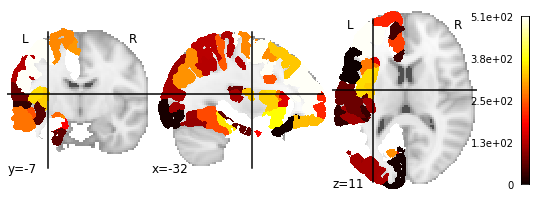

In [14]:
from nilearn import plotting
plotting.plot_stat_map(mpm.fetch())

Now this is only the left hemisphere! This is because Julich-Brain ships the left and right hemispheres in different volumes, so corresponding regions can use the same label index and still be distinguished. In fact, if a parcellation provides multiple maps, we can iterate them using `fetch_iter_()`:

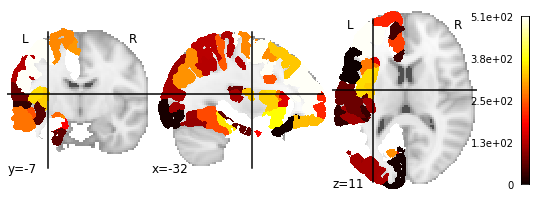

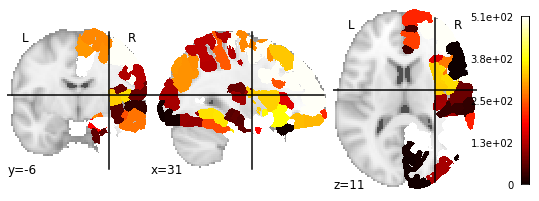

In [15]:
for img in mpm.fetch_iter():
    plotting.plot_stat_map(img)

### Probabilistic maps

Julich-Brain, like some other parcellations, is a probabilistic map. The labelled volumes above are just a simplified representation, displaying for each voxel the btain region of highes probability. We can access the much richer information of the probability maps, which provide a continuous distribution in the reference space for each parcticular region.

We received the labelled volumes above because `siibra` uses labelled volumes as the default map type. To retrieve probability maps, we explictiely use `siibra.maptype.CONTINUOUS`.

In [16]:
pmaps = atlas.get_map('mni152','julich',maptype='continuous')

[siibra:INFO] Multiple elements matched the specification 'julich' - the first in order was chosen: Julich-Brain Cytoarchitectonic Maps 2.9
[siibra:INFO] 296 regional continuous maps found for Julich-Brain Cytoarchitectonic Maps 2.9 in MNI152 2009c nonl asym.


Again, we can iterate over all >300 pmaps using `fetch_iter_()`. For simplicity, we will just a random index here.

[siibra:INFO] Returning map 103 of in total 302 available maps.


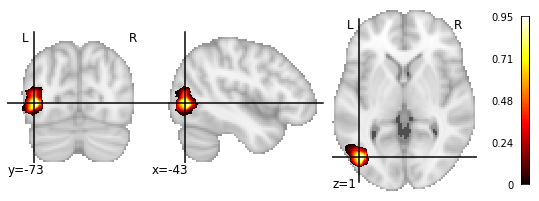

In [17]:
pmap = pmaps.fetch(mapindex=102)
plotting.plot_stat_map(pmap)

### Linking region objects with map and label indices

Now you migh wonder which region this refers to. Of course, the parcellation objects in `siibra` help you to safely translate indices into regions, and vice versa:

In [18]:
# which region corresponds to map index 10?
pmaps.get_index(mapindex=102)

Area IFJ1 (IFS,PreCS) left

In [19]:
# vice versa, what is the index of that region?
pmaps.get_index('hoc5 left')

[ParcellationIndex (98/None)]

In general, a region can be linked to a map index (the index of the image volume) and to a label index (the color in a labelled parcellation map, which does not apply to continuous maps). So, in order to find the label index of CM left in the maximum probability map, we would do exactly the same but get a different index:

In [20]:
mpm.get_index("hoc5 left")

[ParcellationIndex (0/6.0)]

We can verify the index by thresholding the MPM with the label index.

[siibra:INFO] Returning map 1 of in total 2 available maps.


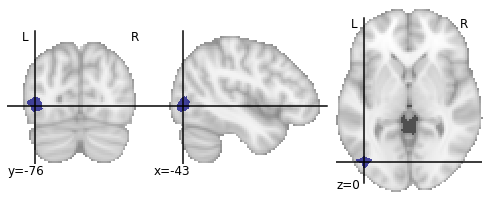

In [21]:
# fetch the left hemishpere maximum probability map
mpm_l = mpm.fetch()

# build a mask by thresholding the label index reported for hoc5
import numpy as np
from nibabel import Nifti1Image
A = mpm_l.get_fdata()
A[A!=6] = 0
mask = Nifti1Image(A,mpm_l.affine)
plotting.plot_roi(mask)

Of course, in order to get a regional mask, you need not take these steps. `siibra`'s region objects can do that right away.

[siibra:INFO] No parcellation specified, using default 'Julich-Brain Cytoarchitectonic Maps 2.9'.


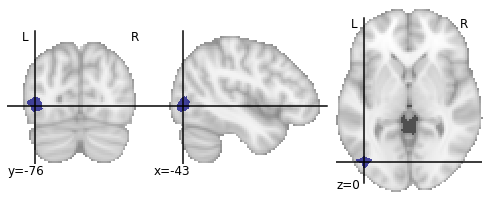

In [22]:
mask = atlas.get_region('hoc5 left').build_mask("mni152")
plotting.plot_roi(mask)

## Extracting volumes of interest from high-resolution data

To access BigBrain Data at higher resolution, we specify a rectangular volume of interest spanned by two 3D points in physical coordinates.

In [23]:
points = siibra.PointSet([
    "-30.590mm, 3.270mm, 47.814mm",
    "-26.557mm, 6.277mm, 50.631mm"], 
    space="bigbrain")

The volume of interest definition is requested from the desired space. Here, we use the BigBrain space of course.

In [24]:
voi = atlas.get_voi('bigbrain',points[0],points[1])

Now we can extract a chunk from the BigBrain template a full resolution of 20 micron using this volume of interest.

In [25]:
bigbrainchunk = atlas.get_template('bigbrain').fetch(resolution_mm=0.02,voi=voi)
plotting.view_img(bigbrainchunk,None,cmap='gray')

ConnectionError: HTTPSConnectionPool(host='neuroglancer.humanbrainproject.eu', port=443): Max retries exceeded with url: /precomputed/BigBrainRelease.2015/8bit/info (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x12fb46af0>: Failed to establish a new connection: [Errno 61] Connection refused'))

The resulting image chunk sits properly in its reference space, so we can also plot it in anatomical context of the low-resolution whole brain model.

/usr/local/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:456: RuntimeWarning: overflow encountered in ubyte_scalars
  if background > .5 * (vmin + vmax):
/usr/local/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:465: RuntimeWarning: overflow encountered in ubyte_scalars
  vmean = .5 * (vmin + vmax)


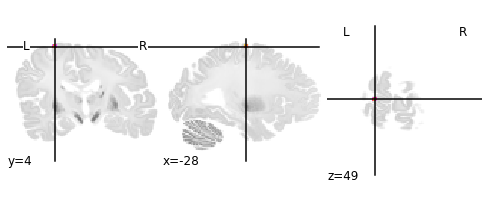

In [26]:
# Note that we already fetched the template volume above:
# tpl=bigbraintemplate.fetch(resolution_mm=0.64)
tpl = atlas.get_template('bigbrain').fetch(resolution_mm=1.28)
plotting.plot_roi(bigbrainchunk,bg_img=tpl)

We can apply this volume of interest to extract chunks from other objects in the same space, like parcellation maps. Here we use the coritcal layer maps of BigBrain. We can use the LabelledParcellation object for the cortical layer maps that we requested further above, but no call its `fetch()` method again with a different resolution and the volume of interest specification.


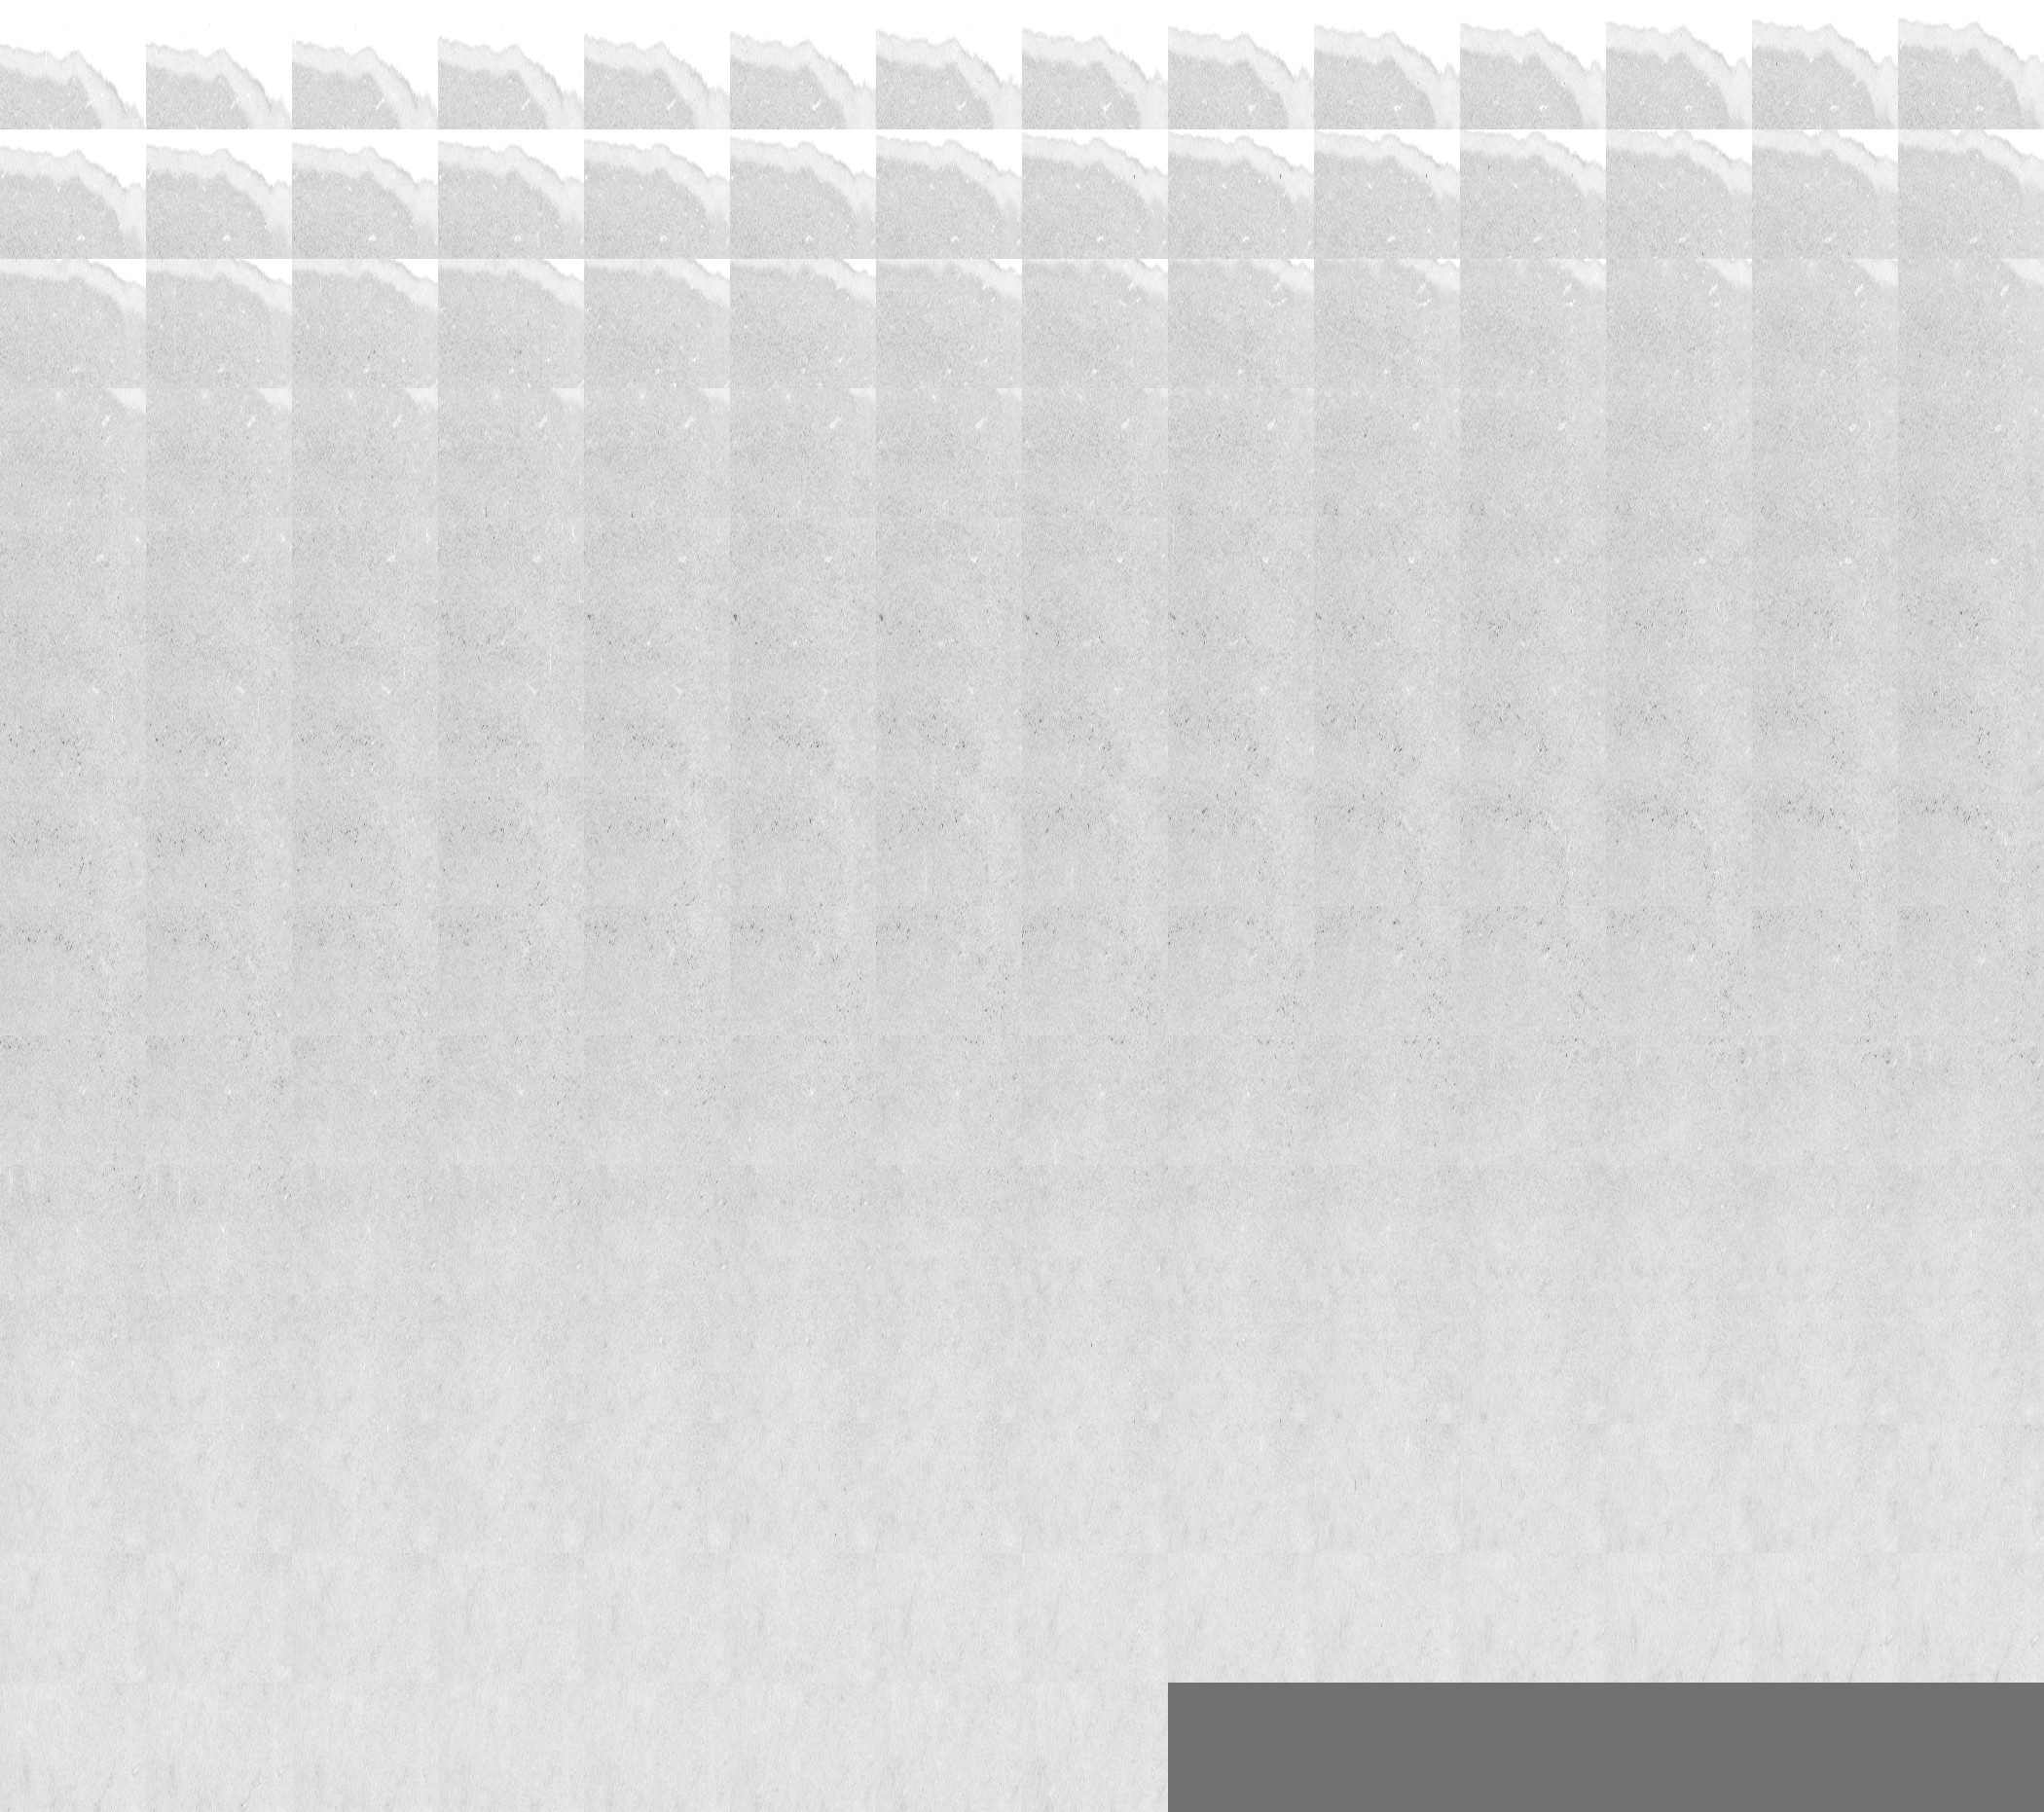
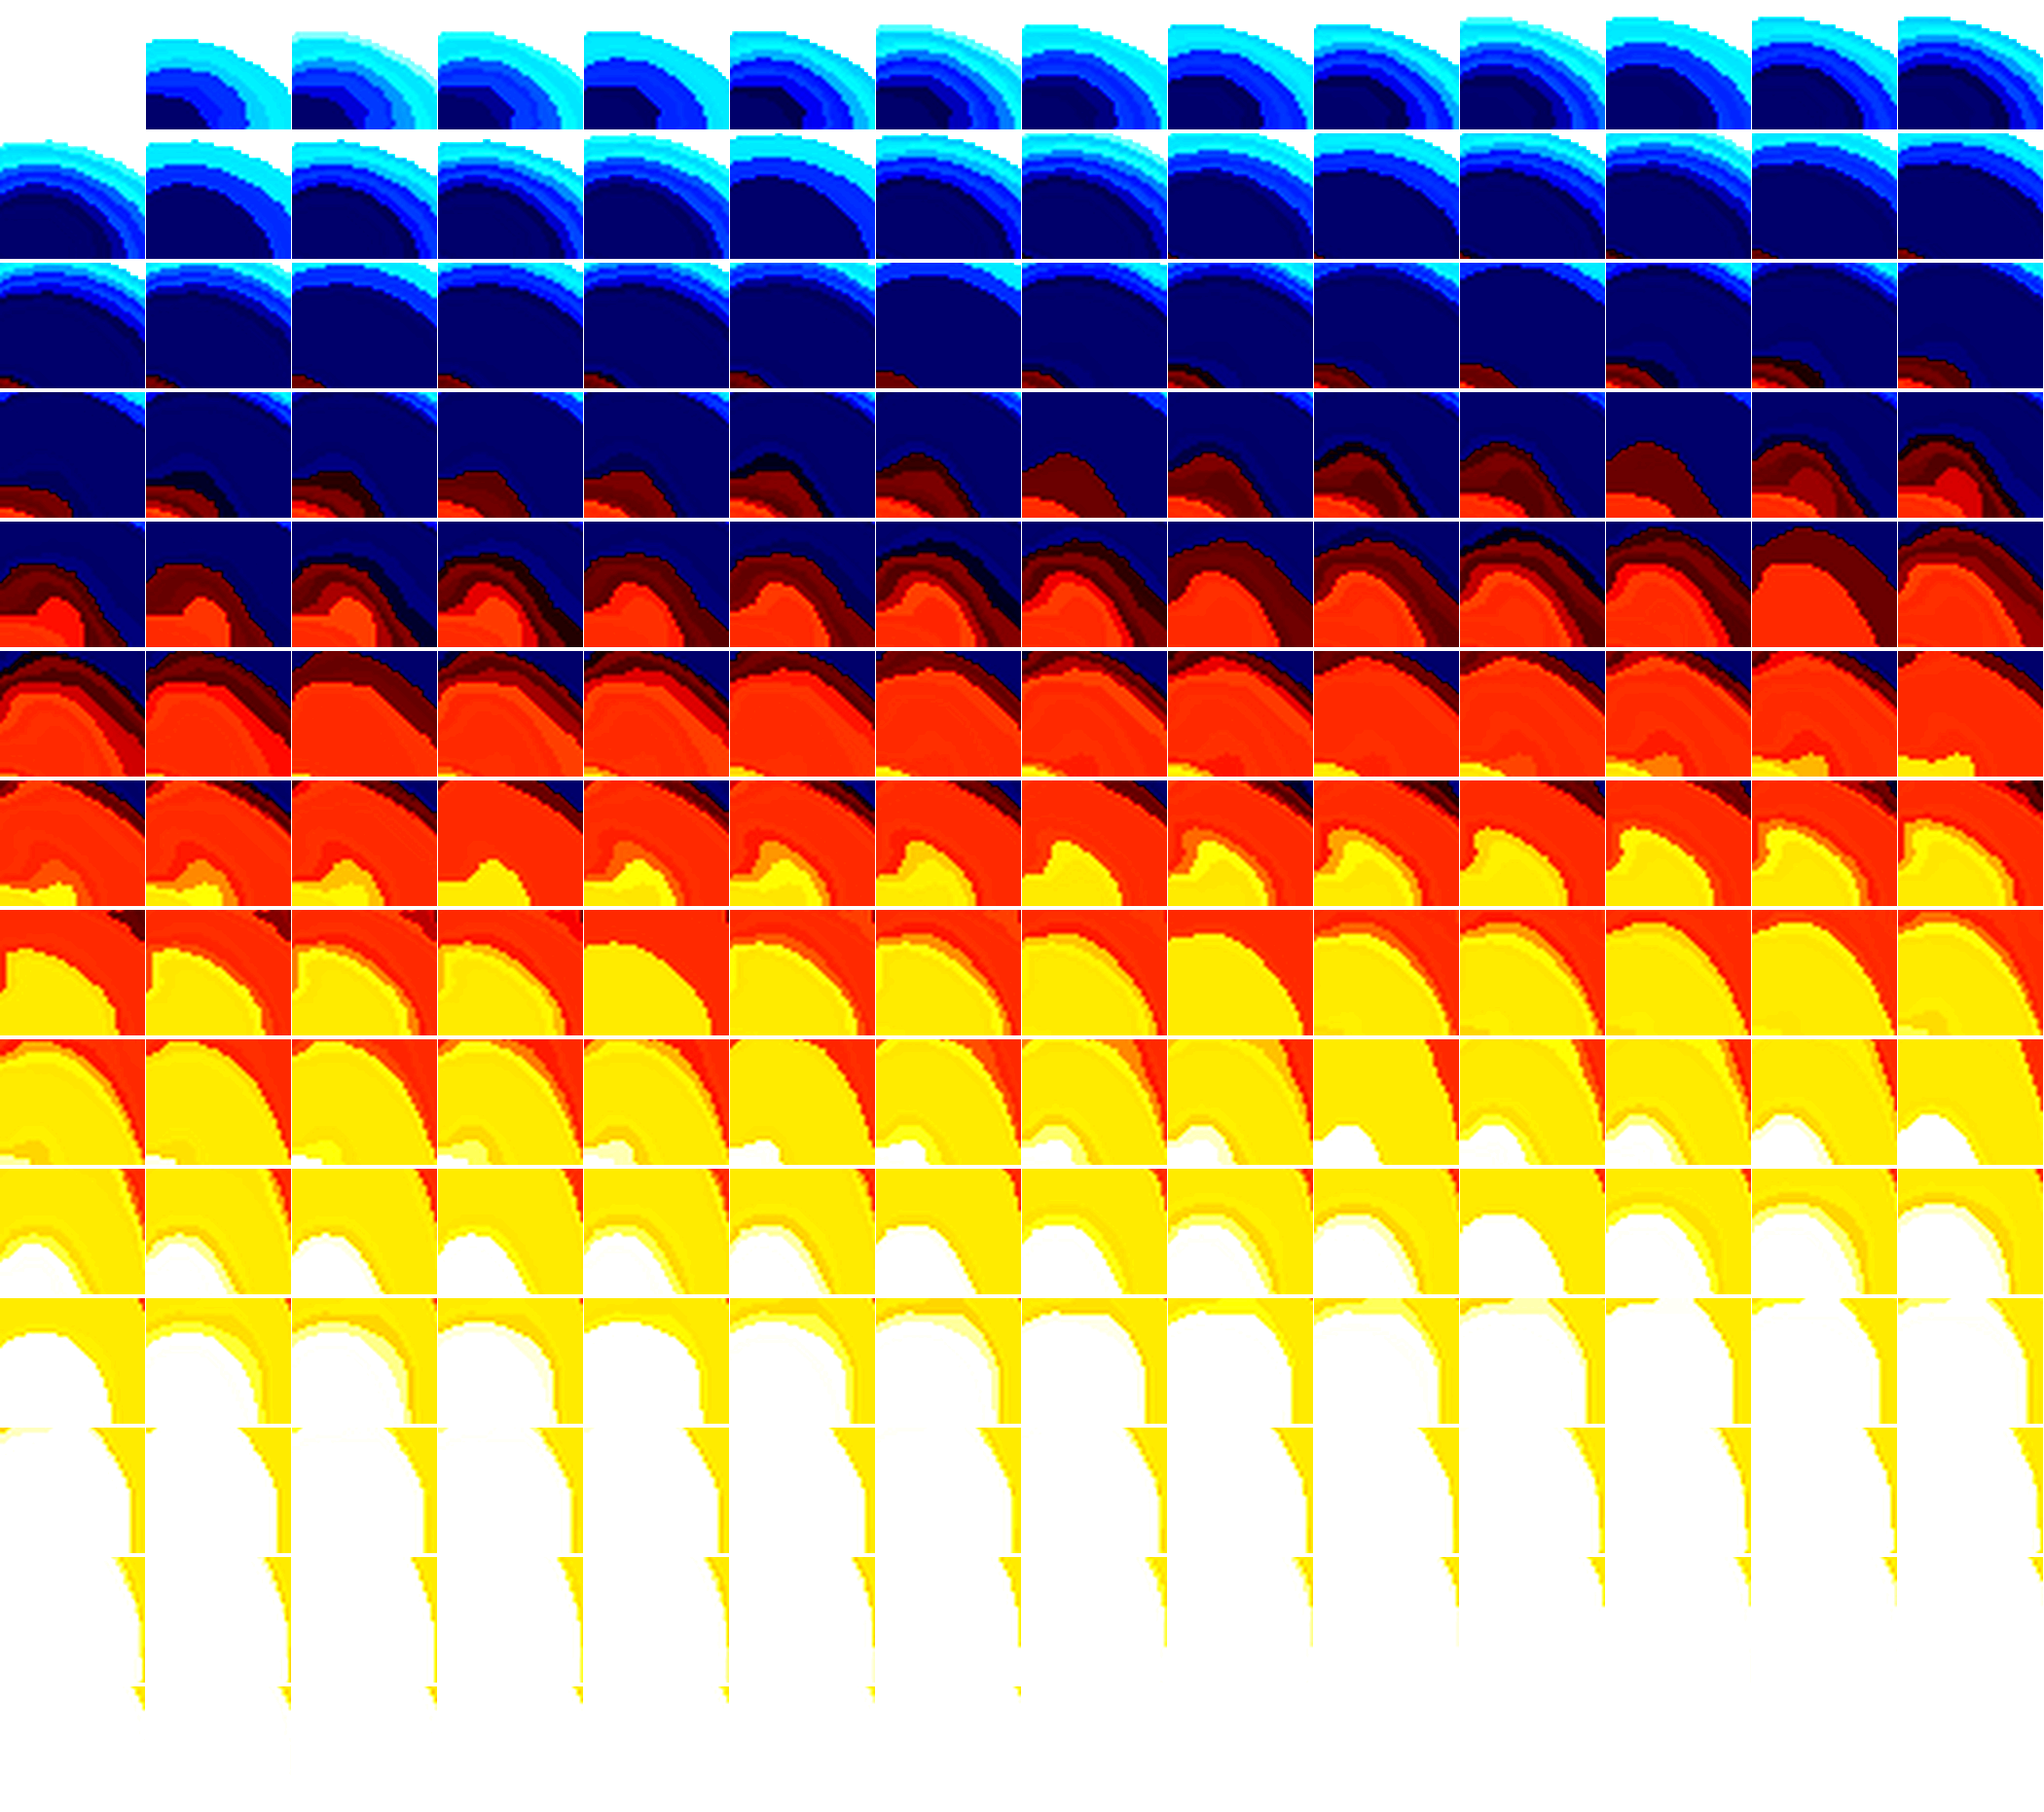

In [27]:
layermap = atlas.get_map(space='bigbrain',parcellation='layers')
mask = layermap.fetch(resolution_mm=0.08,voi=voi)
plotting.view_img(mask,bg_img=bigbrainchunk,opacity=.1,symmetric_cmap=False)

If you wonder where in the brain this location might be, `siibra` can help you as well. For example, we can simply use the probability maps in MNI152 space that we obtained above to lookup the most likely region at the center of this volume of interest. Note that the volume of interest is defined in a different space - `siibra` will do its best to convert the coordinates.

We will cover coordinate assignment in more depth later.

In [28]:
m = atlas.get_map('mni152','julich','continuous')
# Note: the map is in MNI space, while voi is in BigBrain space. 
# siibra will convert coordinates to look up the most probable region.
m.assign_coordinates(voi.center)

[siibra:INFO] Multiple elements matched the specification 'julich' - the first in order was chosen: Julich-Brain Cytoarchitectonic Maps 2.9
[siibra:INFO] Coordinates will be converted from Big Brain to MNI152 2009c nonl asym space for assignment.
Assigning 1 coordinates to 302 maps: 100%|██████████| 302/302 [00:43<00:00,  7.02 maps/s]


[(Area 6d1 (PreCG) left,
  0.27969709038734436),
 (Area 4a (PreCG) left,
  0.2042032778263092)]